<a href="https://colab.research.google.com/github/satyakamuju72/Music_Genre_Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
import librosa
import sklearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/Music Genre Classification/Data.zip'

Archive:  /content/drive/MyDrive/Music Genre Classification/Data.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/

In [6]:
df = pd.read_csv('/content/Data/features_3_sec.csv')

In [42]:
df.columns

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

In [7]:
df.shape

(9990, 60)

In [8]:
df = df.drop(labels='filename',axis=1)

###Understanding Audio

In [9]:
recording = "/content/Data/genres_original/classical/classical.00005.wav"
data,sr = librosa.load(recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [41]:
librosa.load(recording,sr=45600) #decodes the audio file into 1d array with time series = data and sampling rate of data as 45600 

(array([-0.02447323, -0.03768142, -0.04438795, ..., -0.00147276,
        -0.00145815, -0.00080342], dtype=float32), 45600)

In [11]:
Audio(data,rate=sr)

###Visualizing data

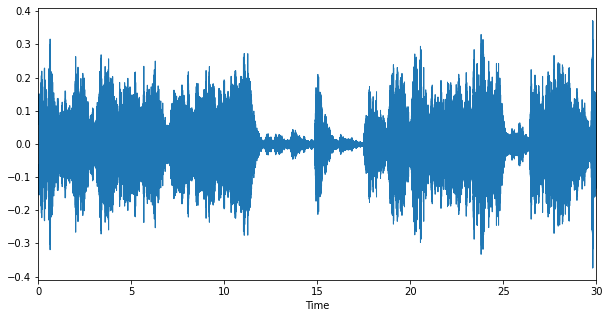

In [ ]:
plt.figure(figsize=(10,5))
librosa.display.waveplot(data) 
plt.show()

###Spectogram

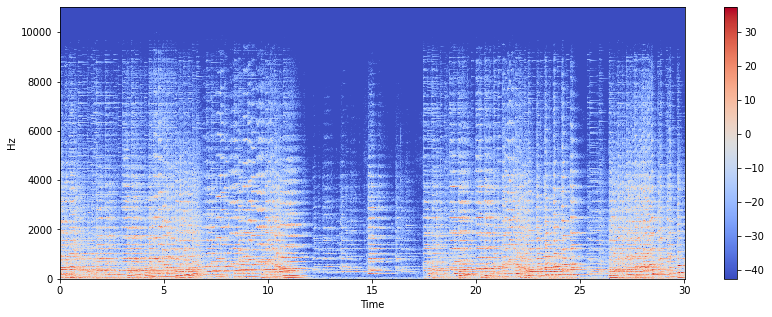

In [12]:
X = librosa.stft(data) #converts data into short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X)) #determine the amplitude of various frequencies playing at a given time of an audio signal.
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') #displays spectogram
plt.colorbar()

###Feature Extraction


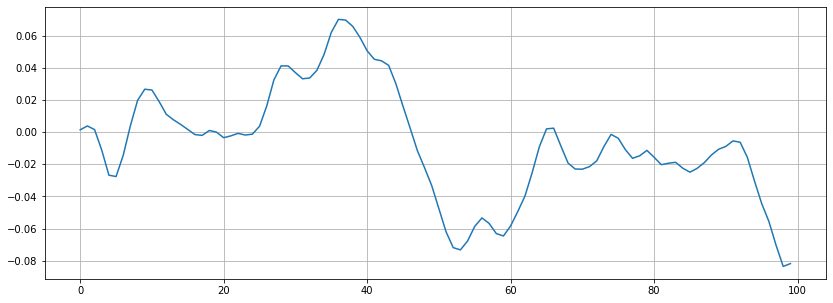

In [23]:
#zooming in
n0 = 9300
n1 = 9400
plt.figure(figsize=(14, 5)) 
plt.plot(data[n0:n1])   #we will print spectrum for 100 array columns only.
plt.grid()

In [24]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

9


###Spectral Centroid


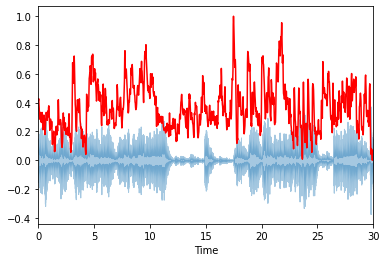

In [28]:
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

###Spectral Rolloff


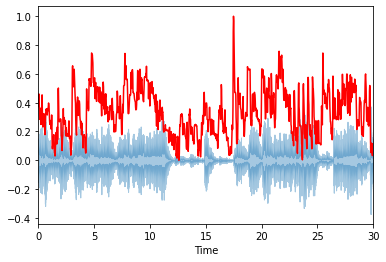

In [29]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

###mfcs

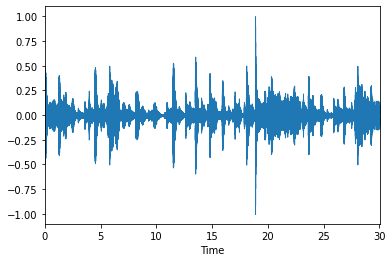

In [39]:
x, fs = librosa.load('/content/Data/genres_original/blues/blues.00089.wav')
librosa.display.waveplot(x, sr=sr)